In [0]:
import pandas as pd
import json
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
items_details =[]
file_name1 = "/content/drive/My Drive/item_details.json"
for line in open(file_name1, 'r'):
    items_details.append(json.loads(line))
df_items = pd.DataFrame(items_details)

In [0]:
#If you want to directly check the recommendation without training the model the dataset of new and old customers are at :
#https://github.com/Satkarjain/Size-recommendation-system.git

In [0]:
df_items.shape

(82790, 18)

In [0]:
df_items.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29,7,5.0,d,38,34,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31,13,3.0,b,30,36,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30,7,2.0,b,NaN,32,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.00,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [0]:
df_items.columns = ['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text']

In [0]:
df_items.dtypes

item_id            object
waist              object
size                int64
quality           float64
cup_size           object
hips               object
bra_size           object
category           object
bust               object
height             object
user_name          object
length             object
fit                object
user_id            object
shoe_size          object
shoe_width         object
review_summary     object
review_text        object
dtype: object

In [0]:
df_items.head()

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29,7,5.0,d,38,34,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31,13,3.0,b,30,36,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30,7,2.0,b,NaN,32,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.00,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [0]:
df_items["item_id"].nunique()

1378

In [0]:
df_items["user_id"].nunique()

47958

In [0]:
def get_cms(x):
    if type(x) == type(1.0):
        return
    #print(x)
    try: 
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)
df_items.height = df_items.height.apply(get_cms)

In [0]:
null_values = df_items.isnull().sum()

In [123]:
null_values/(len(df_items))    

item_id           0.000000
waist             0.965189
size              0.000000
quality           0.000821
cup_size          0.075553
hips              0.322817
bra_size          0.072690
category          0.000000
bust              0.856818
height            0.013371
user_name         0.000000
length            0.000423
fit               0.000000
user_id           0.000000
shoe_size         0.662822
shoe_width        0.775251
review_summary    0.081230
review_text       0.081230
dtype: float64

Here we will drop waist and bust column because most of it value is NULL.

In [0]:
df_items.drop(columns=["waist","bust"],inplace = True)

In [0]:
num_col_convert = ["height", "bra_size","hips"]               #Converting these value to numeric 
df_items[num_col_convert] = df_items[num_col_convert].apply(pd.to_numeric, errors="coerce")

In [0]:
df_items.head()

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,7,5.0,d,38.0,34.0,new,167.64,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,13,3.0,b,30.0,36.0,new,157.48,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,7,2.0,b,NaN,32.0,new,170.18,Ugggh,slightly long,small,395665,9.00,NaN,NaN,NaN
3,123373,21,5.0,dd/e,NaN,NaN,new,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,18,5.0,b,NaN,36.0,new,157.48,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [0]:
# Handling hips column
df_items.hips = df_items.hips.fillna(-1.0)
bins = [-5,0,31,37,40,44,75]
labels = ['Unknown','XS','S','M', 'L','XL']
df_items.hips = pd.cut(df_items.hips, bins, labels=labels)

# Handling length column
missing_rows = df_items[df_items.length.isnull()].index
df_items.drop(missing_rows, axis = 0, inplace=True)

# Handling quality
missing_rows = df_items[df_items.quality.isnull()].index
df_items.drop(missing_rows, axis = 0, inplace=True)

In [0]:
df_items.review_summary = df_items["review_summary"].fillna('Unknown')
df_items.review_text = df_items["review_text"].fillna('Unkown')
df_items.drop(['user_name'], axis=1, inplace=True)

In [0]:
median_bra_size = df_items["bra_size"].median()
df_items["bra_size"].fillna( value = median_bra_size,inplace=True )

In [0]:
df_items.describe()                                                     #Statistical analysis of numeric feature

,size,quality,bra_size,height
count,82697.000000,82697.000000,82697.000000,81594.000000
mean,12.660616,3.949128,35.974026,165.473059
std,8.271133,0.992736,3.105588,7.245555
min,0.000000,1.000000,28.000000,91.440000
25%,8.000000,3.000000,34.000000,160.020000
50%,12.000000,4.000000,36.000000,165.100000
75%,15.000000,5.000000,38.000000,170.180000
max,38.000000,5.000000,48.000000,241.300000


In [0]:
pd.DataFrame(df_items.groupby("fit")["quality"].value_counts())

quality
fit   quality         
fit   5.0        23097
      4.0        18877
      3.0        11739
      2.0         2365
      1.0          635
large 4.0         4304
      5.0         4027
      3.0         3396
      2.0         1063
      1.0          246
small 3.0         4386
      4.0         3926
      5.0         2474
      2.0         1701
      1.0          461

To ensure the recommender system is exposed to items with enough rental sample, thereby reducing noise, I want to filter out low-rental and low quality items.

In [0]:
# including items with more than 2 ratings
item_rating_count = pd.DataFrame(df_items.groupby("item_id")["quality"].count())
item_rating_count = item_rating_count.loc[(item_rating_count["quality"] >= 3)]
item_rating_count.reset_index(inplace=True)
df_items_reduced = df_items[df_items["item_id"].isin(item_rating_count["item_id"])]

Here we will filter out the users who had done transaction only one time because for them we can use popularity recommendation beacuse we do not know about the customer so we can not extract latent features from them.

In [0]:
 a = pd.DataFrame(df_items_reduced.groupby("user_id")["item_id"].count())

In [0]:
user_names = a[a["item_id"]>=2]

In [0]:
s = set()

In [0]:
for f in purchases_train:
  for x in f:
    s.add(x)


In [0]:
item_name = list(s)               #list of unique items

In [0]:
user_name_list = list(user_names.index)

In [0]:
len(user_name_list)

15948

In [0]:
#This might take several minutes to execute
purchases_train = []                      #list of items purchased by particular user
p=0
# populate the list with the product codes
for i in user_name_list:
  temp = df_items_reduced[df_items_reduced["user_id"] == i]["item_id"].tolist()
  purchases_train.append(temp)
  p = p+1
  print(p)

My approach of recommendation include extracting 4 different feature from given dataset and then applying classification model.

Features:

1) Observable item feature: category, length and quality

2) Observable user feature: size, bra_size and height

3) Latent item feature: These are generated using skip gram based word2vec model. I use user’s purchase data and product content data from a single category to train category specific model. The input and output for the
word2vec are pairs of items purchased by the same user. After training the network, the activation of hidden layer for every item is the latent features vector.

4) Latent user feature: It is obtained by taking mean of all latent feature of items purchased by user.



![picture](https://drive.google.com/uc?export=view&id=1Otcid8r6WU8Vy4jwGcLwr7ihbZvVKYXJ)

This model is my own implementation of this research paper: https://kddfashion2017.mybluemix.net/final_submissions/ML4Fashion_paper_8.pdf

In [0]:
from gensim.models import Word2Vec

In [0]:
model = Word2Vec(size= 50, window = 5, sg = 1, hs = 0,min_count=1,
                 negative = 2, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

In [0]:
model.build_vocab(purchases_train)
model.train(purchases_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

(313281, 504240)

In [0]:
model.init_sims(replace=True)


In [124]:
print(model)


Word2Vec(vocab=736, size=50, alpha=0.03)


In [0]:
item_embedding = {}                          #embedding of all items
for f in item_name:
  item_embedding[f] = model[f]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
#This might take several minutes to execute
purchases_train_1 = {}
p=0
# populate the list with the product codes
for i in user_name_list:
  temp = df_items_reduced[df_items_reduced["user_id"] == i]["item_id"].tolist()
  purchases_train_1[i] = temp
  p = p+1
 # print(p)

In [0]:
user_embedding ={}
for key,items in purchases_train_1.items():
  a = np.zeros(50)
  size_1 = len(items)
  for x in items:
    a1 = model[x]
    a = a+a1
  a = a/size_1
  user_embedding[key] = a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:
df_items_model = pd.DataFrame()

In [0]:
for f in item_name:
  r = df_items_reduced[df_items_reduced["item_id"]==f]
  df_items_model = pd.concat([df_items_model,r])

In [0]:
df_items_model.reset_index(drop = True,inplace=True)

In [0]:
df_items_model.head()

,item_id,size,quality,cup_size,hips,bra_size,category,height,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,708795,26,5.0,d,M,40.0,bottoms,157.48,just right,fit,68760,NaN,NaN,These shorts are perfect.,These shorts are perfect. love the high waist ...
1,708795,26,5.0,NaN,Unknown,36.0,bottoms,175.26,just right,small,800565,NaN,NaN,Super Comfy and cute!,These shorts are very comfortable and really c...
2,708795,26,3.0,d,M,42.0,bottoms,154.94,slightly short,fit,802800,7.50,wide,I wear short shorts!,Bought these over the summer because I wanted ...
3,708795,20,3.0,NaN,L,36.0,bottoms,165.10,slightly short,large,731527,NaN,NaN,I haven't bought shorts i,I haven't bought shorts in probably half a dec...
4,708795,32,3.0,dddd/g,XL,38.0,bottoms,175.26,slightly short,small,539237,NaN,NaN,Again describtion of fit,Again describtion of fit was wrong. 3x was v...


In [0]:
df_items_model_copy = df_items_model.copy()

In [0]:
df_items_model_copy["length"].unique()

array(['just right', 'slightly short', 'very short', 'very long',
       'slightly long'], dtype=object)

In [0]:
df_items_model_copy = pd.get_dummies(df_items_model_copy, columns=['category',"length"],drop_first=True)


In [0]:
 df_items_model.shape

(81609, 15)

In [0]:
df_items_model_copy.shape

(81609, 23)

In [0]:
df_item_latent  = pd.DataFrame()

In [0]:
missing=[0]*50
def fun(key):
    try:
        return(model[key])
    except:
        return(missing)

df_item_latent['vector'] = df_items_model_copy['item_id'].apply(fun)
df_item_latent = pd.DataFrame(df_item_latent['vector'].values.tolist())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [0]:
df_item_latent["item_id"] = df_items_model_copy["item_id"]

In [0]:
df_items_model_copy1 = df_items_model_copy[:10]

In [0]:
p= df_items_model_copy[df_items_model_copy["user_id"]=="978352"]
p.shape[0]

1

In [0]:
column_name = list(df_item_latent.columns)
column_name_new = []
for f in column_name:
  column_name_new.append(str(f)+"_")

df_item_latent.columns = column_name_new

In [0]:
 df_1 = pd.concat([df_items_model_copy,df_item_latent],axis =1)

In [0]:
#This might take several minutes to execute
df_user_latent = pd.DataFrame()
def fun1(key):
    p= df_items_model_copy[df_items_model_copy["user_id"]==key]
    if(p.shape[0]>1):
      return(user_embedding[key])

    else:
      key1 = list(p["item_id"])[0]
      return(model[key1])

df_user_latent['vector'] = df_items_model_copy['user_id'].apply(fun1)
df_user_latent = pd.DataFrame(df_user_latent['vector'].values.tolist())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [0]:
df_user_latent1 = df_user_latent.copy()

In [0]:
df_2 = pd.concat([df_1,df_user_latent1],axis =1)

In [0]:
df_2["height"].fillna(value = np.mean(df_2["height"]),inplace = True)

In [0]:
df_2.head()

,item_id,size,quality,cup_size,hips,bra_size,height,fit,user_id,shoe_size,shoe_width,review_summary,review_text,category_dresses,category_new,category_outerwear,category_sale,category_tops,category_wedding,length_slightly long,length_slightly short,length_very long,length_very short,0_,1_,2_,3_,4_,5_,6_,7_,8_,9_,10_,11_,12_,13_,14_,15_,16_,...,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,708795,26,5.0,d,M,40.0,157.48,fit,68760,NaN,NaN,These shorts are perfect.,These shorts are perfect. love the high waist ...,0,0,0,0,0,0,0,0,0,0,0.057086,-0.186593,0.177729,0.1107,0.153043,0.09279,-0.193406,-0.06623,-0.316102,-0.218016,-0.105528,0.031738,-0.034441,0.034276,-0.073065,0.013825,0.025133,...,-0.105528,0.031738,-0.034441,0.034276,-0.073065,0.013825,0.025133,-0.042953,-0.071010,0.116180,0.148204,-0.149073,0.090895,0.152833,-0.128877,-0.071834,-0.129558,0.075410,0.041880,0.196796,0.200403,-0.022617,-0.041430,-0.040605,-0.063466,0.314537,-0.174997,-0.000699,-0.113145,-0.038101,-0.035362,-0.330448,0.162426,0.032326,0.200165,-0.123334,0.083734,-0.023109,0.213554,0.238842
1,708795,26,5.0,NaN,Unknown,36.0,175.26,small,800565,NaN,NaN,Super Comfy and cute!,These shorts are very comfortable and really c...,0,0,0,0,0,0,0,0,0,0,0.057086,-0.186593,0.177729,0.1107,0.153043,0.09279,-0.193406,-0.06623,-0.316102,-0.218016,-0.105528,0.031738,-0.034441,0.034276,-0.073065,0.013825,0.025133,...,-0.101543,0.000735,-0.030232,0.086793,-0.097568,0.030748,0.020790,-0.026533,-0.038479,0.112260,0.118732,-0.172148,0.110606,0.113997,-0.117494,-0.085504,-0.107804,0.093337,0.079030,0.175313,0.182411,-0.002150,-0.012738,-0.011148,-0.033331,0.317264,-0.205180,0.007820,-0.075723,-0.012347,0.000853,-0.297049,0.139662,0.059447,0.227797,-0.140216,0.115696,-0.013150,0.127017,0.230910
2,708795,26,3.0,d,M,42.0,154.94,fit,802800,7.50,wide,I wear short shorts!,Bought these over the summer because I wanted ...,0,0,0,0,0,0,0,1,0,0,0.057086,-0.186593,0.177729,0.1107,0.153043,0.09279,-0.193406,-0.06623,-0.316102,-0.218016,-0.105528,0.031738,-0.034441,0.034276,-0.073065,0.013825,0.025133,...,-0.105528,0.031738,-0.034441,0.034276,-0.073065,0.013825,0.025133,-0.042953,-0.071010,0.116180,0.148204,-0.149073,0.090895,0.152833,-0.128877,-0.071834,-0.129558,0.075410,0.041880,0.196796,0.200403,-0.022617,-0.041430,-0.040605,-0.063466,0.314537,-0.174997,-0.000699,-0.113145,-0.038101,-0.035362,-0.330448,0.162426,0.032326,0.200165,-0.123334,0.083734,-0.023109,0.213554,0.238842
3,708795,20,3.0,NaN,L,36.0,165.10,large,731527,NaN,NaN,I haven't bought shorts i,I haven't bought shorts in probably half a dec...,0,0,0,0,0,0,0,1,0,0,0.057086,-0.186593,0.177729,0.1107,0.153043,0.09279,-0.193406,-0.06623,-0.316102,-0.218016,-0.105528,0.031738,-0.034441,0.034276,-0.073065,0.013825,0.025133,...,-0.105528,0.031738,-0.034441,0.034276,-0.073065,0.013825,0.025133,-0.042953,-0.071010,0.116180,0.148204,-0.149073,0.090895,0.152833,-0.128877,-0.071834,-0.129558,0.075410,0.041880,0.196796,0.200403,-0.022617,-0.041430,-0.040605,-0.063466,0.314537,-0.174997,-0.000699,-0.113145,-0.038101,-0.035362,-0.330448,0.162426,0.032326,0.200165,-0.123334,0.083734,-0.023109,0.213554,0.238842
4,708795,32,3.0,dddd/g,XL,38.0,175.26,small,539237,NaN,NaN,Again describtion of fit,Again describtion of fit was wrong. 3x was v...,0,0,0,0,0,0,0,1,0,0,0.057086,-0.186593,0.177729,0.1107,0.153043,0.09279,-0.193406,-0.06623,-0.316102,-0.218016,-0.105528,0.031738,-0.034441,0.034276,-0.073065,0.013825,0.025133,...,-0.071017,-0.009298,-0.015125,0.113387,-0.097608,0.044606,-0.002965,-0.040976,-0.042991,0.170305,0.150593,-0.082139,0.133045,0.119403,-0.106784,-0.141407,-0.174069,0.030360,0.097196,0.106767,0.230657,0.046017,0.044546,0.003914,-0.050624,0.311462,-0.185149,0.094119,-0.051145,0.035212,-0.053201,-0.202214,0.097352,0.040853,0.149403,-0.090826,0.069283,0.090102,0.211614,0.186480


In [0]:
df_2.drop(columns=["shoe_size","shoe_width","hips"],inplace = True)

In [0]:
df_2.isnull().sum()

item_id        0
size           0
quality        0
cup_size    6042
bra_size       0
            ... 
45             0
46             0
47             0
48             0
49             0
Length: 121, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score


In [0]:
# including users who had purchased more than 2 items.
item_rating_count = pd.DataFrame(df_2.groupby("user_id")["item_id"].count())
item_rating_count = item_rating_count.loc[(item_rating_count["item_id"] >= 2)]
item_rating_count.reset_index(inplace=True)
df_2_reduced = df_2[df_2["user_id"].isin(item_rating_count["user_id"])]

In [0]:
df_2_reduced.drop(columns=["review_summary","review_text"],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
df_2_reduced.shape

(50424, 119)

In [0]:
df_2_reduced.shape

(50424, 119)

In [0]:
df_2_reduced.to_csv('old_customer_data.csv')
!cp old_customer_data.csv "drive/My Drive/

/bin/bash: -c: line 0: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [0]:
# new customers
item_rating_count = pd.DataFrame(df_2.groupby("user_id")["item_id"].count())
item_rating_count = item_rating_count.loc[(item_rating_count["item_id"] < 2)]
item_rating_count.reset_index(inplace=True)
df_2_new_customer = df_2[df_2["user_id"].isin(item_rating_count["user_id"])]

In [0]:
df_2_reduced.to_csv('old_customer_data.csv')

In [0]:
df_2_new_customer.head()

,item_id,size,quality,cup_size,bra_size,height,fit,user_id,review_summary,review_text,category_dresses,category_new,category_outerwear,category_sale,category_tops,category_wedding,length_slightly long,length_slightly short,length_very long,length_very short,0_,1_,2_,3_,4_,5_,6_,7_,8_,9_,10_,11_,12_,13_,14_,15_,16_,17_,18_,19_,...,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,695751,6,4.0,NaN,36.0,160.02,fit,845524,I sized up one and they f,I sized up one and they fit great! New favorit...,0,0,0,0,0,0,1,0,0,0,-0.091855,0.093151,0.034536,-0.051312,0.329330,-0.194887,0.168937,0.167237,-0.161043,-0.182791,0.086957,0.126158,-0.013107,0.068875,-0.107906,0.187617,0.144140,-0.019449,-0.035291,0.096993,...,0.086957,0.126158,-0.013107,0.068875,-0.107906,0.187617,0.144140,-0.019449,-0.035291,0.096993,-0.038490,0.013259,-0.088093,0.223043,-0.186384,-0.033474,-0.049579,-0.146185,0.035802,0.171437,0.023631,0.015409,-0.141424,0.196027,0.116226,0.244588,0.204593,-0.082096,0.080901,-0.063240,-0.018888,-0.071242,-0.171512,-0.031716,0.116633,-0.034531,0.117369,0.225201,0.330452,-0.210138
1,695751,8,5.0,NaN,36.0,152.40,small,564731,Get. These. Jeans. I am 5,"Get. These. Jeans. I am 5?0, 117#, and short w...",0,0,0,0,0,0,1,0,0,0,-0.091855,0.093151,0.034536,-0.051312,0.329330,-0.194887,0.168937,0.167237,-0.161043,-0.182791,0.086957,0.126158,-0.013107,0.068875,-0.107906,0.187617,0.144140,-0.019449,-0.035291,0.096993,...,0.086957,0.126158,-0.013107,0.068875,-0.107906,0.187617,0.144140,-0.019449,-0.035291,0.096993,-0.038490,0.013259,-0.088093,0.223043,-0.186384,-0.033474,-0.049579,-0.146185,0.035802,0.171437,0.023631,0.015409,-0.141424,0.196027,0.116226,0.244588,0.204593,-0.082096,0.080901,-0.063240,-0.018888,-0.071242,-0.171512,-0.031716,0.116633,-0.034531,0.117369,0.225201,0.330452,-0.210138
5,391163,15,5.0,d,36.0,162.56,fit,807229,Loved it!,"Comfy, great fit and pretty! My butt kinda (we...",1,0,0,0,0,0,0,0,0,0,-0.004768,0.092888,0.051175,-0.042438,0.281012,-0.179847,0.188282,0.152689,-0.129476,-0.169379,0.109129,0.112905,-0.007924,0.133280,-0.051324,0.207086,0.141235,-0.084536,-0.062473,0.136817,...,0.109129,0.112905,-0.007924,0.133280,-0.051324,0.207086,0.141235,-0.084536,-0.062473,0.136817,-0.033459,0.035802,-0.101581,0.205719,-0.168717,0.035832,-0.035499,-0.118292,0.079594,0.134599,-0.019575,-0.008005,-0.227731,0.210665,0.101596,0.314005,0.160842,-0.048320,0.041485,0.011712,-0.051366,-0.060972,-0.181034,-0.035950,0.149283,0.002016,0.116517,0.179443,0.349266,-0.207463
6,391163,4,5.0,c,34.0,165.10,fit,439245,Perfect dress for work and play,Got this dress for Christmas and wore it plent...,1,0,0,0,0,0,0,0,0,0,-0.004768,0.092888,0.051175,-0.042438,0.281012,-0.179847,0.188282,0.152689,-0.129476,-0.169379,0.109129,0.112905,-0.007924,0.133280,-0.051324,0.207086,0.141235,-0.084536,-0.062473,0.136817,...,0.109129,0.112905,-0.007924,0.133280,-0.051324,0.207086,0.141235,-0.084536,-0.062473,0.136817,-0.033459,0.035802,-0.101581,0.205719,-0.168717,0.035832,-0.035499,-0.118292,0.079594,0.134599,-0.019575,-0.008005,-0.227731,0.210665,0.101596,0.314005,0.160842,-0.048320,0.041485,0.011712,-0.051366,-0.060972,-0.181034,-0.035950,0.149283,0.002016,0.116517,0.179443,0.349266,-0.207463
8,391163,8,5.0,NaN,34.0,175.26,fit,563434,Love it!,I just got this and I can't wait to wear it ou...,1,0,0,0,0,0,0,0,0,0,-0.004768,0.092888,0.051175,-0.042438,0.281012,-0.179847,0.188282,0.152689,-0.129476,-0.169379,0.109129,0.112905,-0.007924,0.133280,-0.051324,0.207086,0.141235,-0.084536,-0.062473,0.136817,...,0.109129,0.112905,-0.007924,0.133280,-0.051324,0.207086,0.141235,-0.084536,-0.062473,0.136817,-0.033459,0.035802,-0.101581,0.205719,-0.168717,0.035832,-0.035499,-0.118292,0.079594,0.134599,-0.019575,-0.008005,-0.227731,0.210665,0.101596,0.314005,0.160842,-0.048320,0.041485,0.011712,-0.051366,-0.060972,-0.181034,-0.035950,0.149283,0.002016,0.116517,0.179443,0.349266,-0.207463


In [0]:
df_2_reduced.drop(columns=["cup_size"],inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
a = {"fit":1, "small":0 , "large":0}
df_2_reduced["fit"] = df_2_reduced["fit"].apply(lambda x : a[x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [217]:
df_2_reduced.drop(columns=["item_id_"],inplace= True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
df_2_reduced.to_csv("old_customers.csv")

In [0]:
df_item_train1,df_item_tes1t = train_test_split(df_2_reduced,
                                               test_size=.2, 
                                               random_state=1001)

In [219]:
df_item_train1.head()

,item_id,size,quality,bra_size,height,fit,user_id,category_dresses,category_new,category_outerwear,category_sale,category_tops,category_wedding,length_slightly long,length_slightly short,length_very long,length_very short,0_,1_,2_,3_,4_,5_,6_,7_,8_,9_,10_,11_,12_,13_,14_,15_,16_,17_,18_,19_,20_,21_,22_,...,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
55285,397005,12,4.0,34.0,172.72,1,746438,1,0,0,0,0,0,0,1,0,0,-0.001476,-0.389533,0.162599,0.267994,-0.061366,0.135982,-0.128696,0.186492,-0.044910,0.018220,-0.058615,-0.107323,0.081473,0.002037,-0.096325,0.130636,0.174513,-0.043281,0.076075,-0.144113,-0.242615,-0.169773,0.167274,...,-0.097852,-0.017476,0.071325,0.039455,-0.105644,0.083442,0.105652,-0.109553,0.019641,0.038989,-0.029735,-0.072568,0.113345,0.018783,-0.065404,-0.042954,-0.014047,-0.043456,0.072545,0.045441,0.200115,0.024232,0.013526,-0.000871,-0.010613,0.208065,-0.186143,0.001799,-0.014324,0.014461,0.036061,-0.140773,0.012465,0.151228,0.109330,-0.134741,0.126130,-0.006300,0.047994,0.156194
72677,427567,12,4.0,34.0,165.10,1,48591,0,0,0,0,1,0,0,0,0,0,-0.019214,-0.207396,0.340636,0.210906,0.024552,0.060151,-0.025964,0.083928,0.044243,-0.033585,-0.219414,0.034306,0.306259,-0.125360,-0.162692,-0.103199,0.181804,-0.167916,0.022094,-0.027766,-0.200274,-0.094358,0.231465,...,-0.174675,0.025717,0.219155,-0.109412,-0.116378,-0.040047,0.159792,-0.173864,-0.004542,-0.002634,-0.118114,-0.090685,0.177116,0.131007,-0.171046,-0.010809,0.084051,-0.010595,0.052919,0.030966,0.154182,-0.001039,0.051151,-0.042950,-0.108772,0.172267,-0.205532,-0.008755,-0.044196,-0.067178,0.018748,-0.137803,-0.110506,0.232847,0.089114,-0.126653,0.146167,-0.028283,0.060699,0.142818
55695,397005,12,5.0,38.0,167.64,1,382035,1,0,0,0,0,0,0,0,0,0,-0.001476,-0.389533,0.162599,0.267994,-0.061366,0.135982,-0.128696,0.186492,-0.044910,0.018220,-0.058615,-0.107323,0.081473,0.002037,-0.096325,0.130636,0.174513,-0.043281,0.076075,-0.144113,-0.242615,-0.169773,0.167274,...,-0.042911,-0.056910,0.040806,0.139001,-0.111909,0.112336,0.038169,-0.032969,0.026712,0.103375,0.013422,-0.067882,0.190809,0.002471,-0.070753,-0.126773,-0.065145,-0.005569,0.133263,0.021069,0.194050,0.094289,0.056771,0.035056,-0.001207,0.215767,-0.179609,0.100104,0.033213,0.055717,0.035462,-0.082514,0.014328,0.093942,0.109528,-0.107279,0.115768,0.096231,0.053049,0.140472
64583,474002,8,5.0,36.0,157.48,0,822525,0,0,0,0,1,0,0,0,0,0,0.082995,-0.145942,0.249468,0.135163,0.194678,0.095757,-0.174600,0.001838,-0.086808,-0.285461,-0.192440,0.060718,0.107765,-0.081219,-0.100453,0.019150,0.178583,-0.217686,-0.007866,0.051810,0.069600,-0.072231,-0.010902,...,-0.109581,-0.014871,0.087424,-0.047286,-0.095080,0.062959,0.173853,-0.126254,0.022952,-0.056166,-0.091917,-0.132276,0.065130,-0.016028,-0.090549,0.049871,0.101273,-0.061917,0.022481,0.058198,0.134962,-0.044504,-0.060542,-0.015888,-0.002653,0.155962,-0.201885,-0.149425,-0.056093,-0.052775,0.115443,-0.165609,0.034401,0.194677,0.169326,-0.156038,0.177621,-0.115354,-0.073518,0.163614
50503,655211,4,4.0,34.0,165.10,1,762117,0,0,0,0,0,0,0,0,0,0,0.123053,-0.106822,-0.006607,-0.027274,0.019324,0.156102,-0.140277,-0.083638,-0.432652,-0.098409,-0.048957,-0.020451,0.041746,0.215093,-0.128772,0.096941,-0.024696,-0.036103,-0.006028,0.217915,0.109139,-0.018148,0.198793,...,-0.103607,0.019852,0.053683,0.064509,-0.101188,0.058258,0.066875,-0.125598,-0.020252,0.143685,0.091721,-0.029155,0.104509,0.122855,-0.081951,-0.101329,-0.145913,-0.044013,0.069967,0.072554,0.267736,0.014153,0.054003,0.003681,-0.051438,0.292188,-0.195358,0.041127,-0.060554,0.038332,-0.058993,-0.184073,0.038549,0.119694,0.090322,-0.090998,0.079180,0.050400,0.200359,0.173132


In [0]:
x_train1 = df_item_train1.drop(columns=["fit","item_id","user_id"])
y_train1 = df_item_train1["fit"]

In [224]:
x_train1.head()

,size,quality,bra_size,height,category_dresses,category_new,category_outerwear,category_sale,category_tops,category_wedding,length_slightly long,length_slightly short,length_very long,length_very short,0_,1_,2_,3_,4_,5_,6_,7_,8_,9_,10_,11_,12_,13_,14_,15_,16_,17_,18_,19_,20_,21_,22_,23_,24_,25_,...,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
55285,12,4.0,34.0,172.72,1,0,0,0,0,0,0,1,0,0,-0.001476,-0.389533,0.162599,0.267994,-0.061366,0.135982,-0.128696,0.186492,-0.044910,0.018220,-0.058615,-0.107323,0.081473,0.002037,-0.096325,0.130636,0.174513,-0.043281,0.076075,-0.144113,-0.242615,-0.169773,0.167274,-0.162676,-0.079538,0.057996,...,-0.097852,-0.017476,0.071325,0.039455,-0.105644,0.083442,0.105652,-0.109553,0.019641,0.038989,-0.029735,-0.072568,0.113345,0.018783,-0.065404,-0.042954,-0.014047,-0.043456,0.072545,0.045441,0.200115,0.024232,0.013526,-0.000871,-0.010613,0.208065,-0.186143,0.001799,-0.014324,0.014461,0.036061,-0.140773,0.012465,0.151228,0.109330,-0.134741,0.126130,-0.006300,0.047994,0.156194
72677,12,4.0,34.0,165.10,0,0,0,0,1,0,0,0,0,0,-0.019214,-0.207396,0.340636,0.210906,0.024552,0.060151,-0.025964,0.083928,0.044243,-0.033585,-0.219414,0.034306,0.306259,-0.125360,-0.162692,-0.103199,0.181804,-0.167916,0.022094,-0.027766,-0.200274,-0.094358,0.231465,0.168800,-0.211067,-0.027779,...,-0.174675,0.025717,0.219155,-0.109412,-0.116378,-0.040047,0.159792,-0.173864,-0.004542,-0.002634,-0.118114,-0.090685,0.177116,0.131007,-0.171046,-0.010809,0.084051,-0.010595,0.052919,0.030966,0.154182,-0.001039,0.051151,-0.042950,-0.108772,0.172267,-0.205532,-0.008755,-0.044196,-0.067178,0.018748,-0.137803,-0.110506,0.232847,0.089114,-0.126653,0.146167,-0.028283,0.060699,0.142818
55695,12,5.0,38.0,167.64,1,0,0,0,0,0,0,0,0,0,-0.001476,-0.389533,0.162599,0.267994,-0.061366,0.135982,-0.128696,0.186492,-0.044910,0.018220,-0.058615,-0.107323,0.081473,0.002037,-0.096325,0.130636,0.174513,-0.043281,0.076075,-0.144113,-0.242615,-0.169773,0.167274,-0.162676,-0.079538,0.057996,...,-0.042911,-0.056910,0.040806,0.139001,-0.111909,0.112336,0.038169,-0.032969,0.026712,0.103375,0.013422,-0.067882,0.190809,0.002471,-0.070753,-0.126773,-0.065145,-0.005569,0.133263,0.021069,0.194050,0.094289,0.056771,0.035056,-0.001207,0.215767,-0.179609,0.100104,0.033213,0.055717,0.035462,-0.082514,0.014328,0.093942,0.109528,-0.107279,0.115768,0.096231,0.053049,0.140472
64583,8,5.0,36.0,157.48,0,0,0,0,1,0,0,0,0,0,0.082995,-0.145942,0.249468,0.135163,0.194678,0.095757,-0.174600,0.001838,-0.086808,-0.285461,-0.192440,0.060718,0.107765,-0.081219,-0.100453,0.019150,0.178583,-0.217686,-0.007866,0.051810,0.069600,-0.072231,-0.010902,0.134303,-0.117085,0.021271,...,-0.109581,-0.014871,0.087424,-0.047286,-0.095080,0.062959,0.173853,-0.126254,0.022952,-0.056166,-0.091917,-0.132276,0.065130,-0.016028,-0.090549,0.049871,0.101273,-0.061917,0.022481,0.058198,0.134962,-0.044504,-0.060542,-0.015888,-0.002653,0.155962,-0.201885,-0.149425,-0.056093,-0.052775,0.115443,-0.165609,0.034401,0.194677,0.169326,-0.156038,0.177621,-0.115354,-0.073518,0.163614
50503,4,4.0,34.0,165.10,0,0,0,0,0,0,0,0,0,0,0.123053,-0.106822,-0.006607,-0.027274,0.019324,0.156102,-0.140277,-0.083638,-0.432652,-0.098409,-0.048957,-0.020451,0.041746,0.215093,-0.128772,0.096941,-0.024696,-0.036103,-0.006028,0.217915,0.109139,-0.018148,0.198793,0.072487,-0.039131,-0.221355,...,-0.103607,0.019852,0.053683,0.064509,-0.101188,0.058258,0.066875,-0.125598,-0.020252,0.143685,0.091721,-0.029155,0.104509,0.122855,-0.081951,-0.101329,-0.145913,-0.044013,0.069967,0.072554,0.267736,0.014153,0.054003,0.003681,-0.051438,0.292188,-0.195358,0.041127,-0.060554,0.038332,-0.058993,-0.184073,0.038549,0.119694,0.090322,-0.090998,0.079180,0.050400,0.200359,0.173132


In [225]:
gb_clf = GradientBoostingClassifier(n_estimators=600, learning_rate=0.1, max_features="sqrt", max_depth=15, random_state=0)
gb_clf.fit(x_train1, y_train1)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=15,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=600,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
x_test1 = df_item_tes1t.drop(columns=["fit","item_id","user_id"])
y_test1 = df_item_tes1t["fit"]

In [0]:
predictions1 = gb_clf.predict(x_test1)

roc_auc_score for DecisionTree:  0.6082983860238016


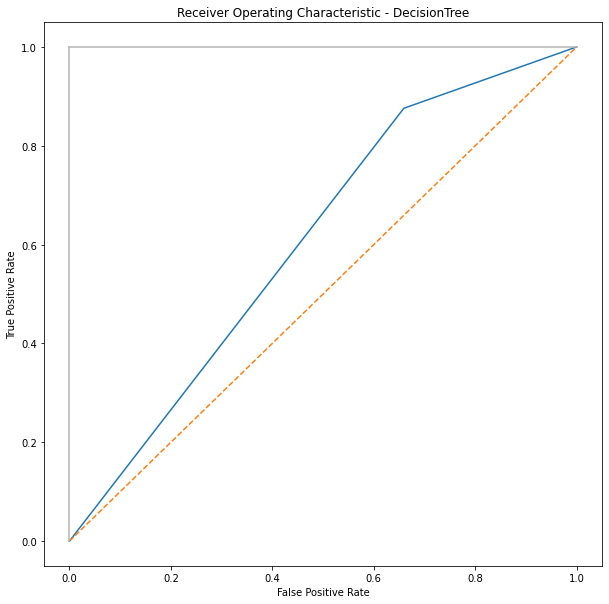

In [228]:
false_positive_rate11, true_positive_rate11, threshold1 = roc_curve(y_test1, predictions1)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test1, predictions1))

# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate11, true_positive_rate11)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Recommendation function

In [0]:
column_names = [ 'size', 'quality','bra_size','height','item_id','user_id','category_dresses','category_new','category_outerwear','category_sale','category_tops','category_wedding','length_slightly long','length_slightly short','length_very long','length_very short','0_','1_','2_','3_','4_','5_','6_','7_','8_','9_','10_','11_','12_','13_','14_','15_','16_','17_','18_','19_','20_','21_','22_','23_','24_','25_','26_','27_','28_','29_','30_','31_','32_','33_','34_','35_','36_','37_','38_','39_','40_','41_','42_','43_','44_','45_','46_','47_','48_','49_',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49]

In [0]:
def recommendation_old_customer(id):
  user_purchased = df_2_reduced[df_2_reduced["user_id"] == id]          
  user_details = user_purchased[["size","bra_size","height"]]
  user_details = user_details.reset_index(drop=True)
  user_details = user_details.iloc[1,:]
  user_details = pd.DataFrame(user_details)
  user_details = user_details.T

  user_recommend = df_2_reduced[df_2_reduced["user_id"]!=id]                                #items not purchased by users
  item_list = df_2_reduced[df_2_reduced["user_id"] == id]["item_id"].to_list()               #item purchased by users

  for f in item_list:
    user_recommend = user_recommend[user_recommend["item_id"]!=f]

  size_1 = user_recommend.shape[0]
  df1 = pd.concat([user_details]*size_1,  ignore_index=True)                                    
  i_d = pd.DataFrame(user_embedding[id])
  i_d = i_d.T
  i_d  = pd.concat([i_d]*size_1,  ignore_index=True)
  df2 = pd.concat([df1,i_d],axis =1)                                                               #Observable and latent feature of user

  df3 = user_recommend.drop(columns=columns_todrop)

  df3 = df3.reset_index(drop= True)
  df4 = pd.concat([df3,df2],axis =1)                                                                # Observable and latent feature of user and observable and latent feature of each item

  df4 = df4[column_names]
  x_df4 = df4.drop(columns=["item_id","user_id"])
  prediction  =gb_clf.predict(x_df4)
  df_prediction  = df4[["item_id","quality"]]
  prediction = pd.DataFrame(prediction)
  df_outcome = pd.concat([df_prediction,prediction],axis=1)
  df_outcome = df_outcome[df_outcome[0]==1]
  df_outcome = df_outcome[df_outcome["quality"]>4]
  recommendation = list(set(list(df_outcome["item_id"])))
  return recommendation


In [255]:
recommendation_old_customer("746438")

['708795',
 '635519',
 '785517',
 '234818',
 '704829',
 '401773',
 '649751',
 '298256',
 '133565',
 '360255',
 '626178',
 '245920',
 '124124',
 '126885',
 '699784',
 '548570',
 '270092',
 '726492',
 '468050',
 '247826',
 '727560',
 '658440',
 '524455',
 '806856',
 '353933',
 '775870',
 '525642',
 '345202',
 '724890',
 '653308',
 '620846',
 '222123',
 '230029',
 '404229',
 '792875',
 '267375',
 '447762',
 '333278',
 '635028',
 '687186',
 '453135',
 '707014',
 '420800',
 '755526',
 '276941',
 '645536',
 '478481',
 '652823',
 '697855',
 '379302',
 '807384',
 '232599',
 '138006',
 '246486',
 '779519',
 '510211',
 '636714',
 '366306',
 '657081',
 '338596',
 '339014',
 '780724',
 '670235',
 '351534',
 '419929',
 '190637',
 '217181',
 '750256',
 '359194',
 '760407',
 '244570',
 '168387',
 '427999',
 '171740',
 '447819',
 '778295',
 '225354',
 '186367',
 '803464',
 '627861',
 '305650',
 '773070',
 '130225',
 '139123',
 '654585',
 '209642',
 '155256',
 '407072',
 '475481',
 '725557',
 '281131',

#New customers

Here I will make TF-IDF vector of reviews of each items and then compute the cosine similarity and recommend the highest score one but with one condition that we recommended item should have size equal to that of user size.


For this I created the dict which will store the list of item_id according to size.

In [0]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [0]:
import nltk

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stop_words = stopwords.words("english")

In [0]:
df_2_new_customer = df_2_new_customer[["item_id","size","quality","bra_size","height","fit","user_id","review_summary","review_text"]]

In [0]:
df_2_new_customer.to_csv("new_customer.csv")

In [0]:
df_2_new_customer.head()

,item_id,size,quality,bra_size,height,fit,user_id,review_summary,review_text
0,695751,6,4.0,36.0,160.02,fit,845524,I sized up one and they f,I sized up one and they fit great! New favorit...
1,695751,8,5.0,36.0,152.40,small,564731,Get. These. Jeans. I am 5,"Get. These. Jeans. I am 5?0, 117#, and short w..."
5,391163,15,5.0,36.0,162.56,fit,807229,Loved it!,"Comfy, great fit and pretty! My butt kinda (we..."
6,391163,4,5.0,34.0,165.10,fit,439245,Perfect dress for work and play,Got this dress for Christmas and wore it plent...
8,391163,8,5.0,34.0,175.26,fit,563434,Love it!,I just got this and I can't wait to wear it ou...


In [0]:
df_2_new_customer.reset_index(drop=True,inplace=True)

In [0]:
df_2_new_customer["combined_reviews"]  =df_2_new_customer["review_summary"]+" "+df_2_new_customer["review_text"]

In [0]:
df_with_reviews = df_2_new_customer[df_2_new_customer["review_summary"]!="Unknown"]

In [0]:
df_with_reviews.shape

(28177, 10)

In [0]:
df_2_new_customer.drop(columns=["review_summary","review_text"],inplace = True)
df_with_reviews.drop(columns=["review_summary","review_text"],inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
def clean(text):
  if(text == "Unkown"):
    return " "
  text = text.lower()
  text = ' '.join( [w for w in text.split() if len(w)>1] )
  text =" ".join([x for x in text.split() if x not in stop_words])
  text=re.sub("[^a-zA-Z]+"," ",text)
  text = re.sub(r'\s+', ' ', text)
  text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
  text=re.sub(' +', ' ', text)
  return text

In [0]:
df_with_reviews["combined_reviews_clean"] = df_with_reviews["combined_reviews"].apply(lambda x: clean(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df_with_reviews.head()

,item_id,size,quality,bra_size,height,fit,user_id,combined_reviews,combined_reviews_clean
0,695751,6,4.0,36.0,160.02,fit,845524,I sized up one and they f I sized up one and t...,sized one sized one fit great new favorite jeans
1,695751,8,5.0,36.0,152.40,small,564731,Get. These. Jeans. I am 5 Get. These. Jeans. I...,get these jeans get these jeans short waisted ...
2,391163,15,5.0,36.0,162.56,fit,807229,"Loved it! Comfy, great fit and pretty! My butt...",loved it comfy great fit pretty butt kinda wel...
3,391163,4,5.0,34.0,165.10,fit,439245,Perfect dress for work and play Got this dress...,perfect dress work play got dress christmas wo...
4,391163,8,5.0,34.0,175.26,fit,563434,Love it! I just got this and I can't wait to w...,love it got can wait wear out always little he...


In [0]:
agg_item_text = pd.DataFrame(df_with_reviews.groupby("item_id")["combined_reviews_clean"].sum())

In [0]:
agg_item_text.head()

,combined_reviews_clean
item_id,
152702,much ruching liked color silhouette fabric dre...
153494,super cute wayyyyyy tight bust m lbs usually w...
154411,wardrobe staple complaint people notice try we...
155256,bought wedding bought wedding perfect m small ...
155530,super cute bit sexy bought dress months ago wo...


In [0]:
tf_idf = TfidfVectorizer()
tf_idf_matrix = tf_idf.fit_transform(agg_item_text["combined_reviews_clean"])
item_tfidf_similarity = cosine_similarity(tf_idf_matrix, tf_idf_matrix)
item_tfidf_similarity_df = pd.DataFrame(item_tfidf_similarity,
                                        columns=agg_item_text.index,
                                        index=agg_item_text.index)

item_tfidf_similarity_df.head()  

item_id,152702,153494,154411,155256,155530,155572,155981,156364,157334,158723,159706,159891,160625,161320,161514,161592,161789,162470,162937,163086,163185,163558,163603,163661,163758,164659,165525,165716,166326,167315,167400,168387,169727,170806,171125,171579,171740,172529,173879,175156,...,774932,775870,776807,777527,778295,778687,779519,779640,780455,780724,781127,781782,782669,785517,786908,787518,789999,790928,792006,792842,792875,793274,795647,795685,796383,797344,799325,800643,800975,803464,803768,804295,805172,805642,806406,806479,806856,807252,807384,807722
item_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
152702,1.000000,0.833729,0.670362,0.676244,0.733018,0.745121,0.502238,0.658048,0.437030,0.465812,0.435925,0.522160,0.667366,0.474244,0.857607,0.741035,0.462082,0.783231,0.380938,0.534924,0.531271,0.744033,0.472246,0.721425,0.644515,0.566996,0.845655,0.777578,0.279618,0.803798,0.613760,0.794544,0.835905,0.673067,0.596486,0.715679,0.808150,0.574990,0.651334,0.554353,...,0.149770,0.350015,0.182493,0.233562,0.225261,0.186578,0.141671,0.189129,0.157521,0.284230,0.190606,0.257544,0.167082,0.246217,0.132856,0.352636,0.157075,0.097934,0.266608,0.349101,0.186897,0.249054,0.072226,0.121961,0.292021,0.135207,0.204370,0.320212,0.290958,0.285164,0.210373,0.066475,0.163506,0.186598,0.145715,0.216186,0.211543,0.205259,0.172190,0.206001
153494,0.833729,1.000000,0.730657,0.688955,0.735057,0.751483,0.506781,0.613453,0.430438,0.471201,0.466769,0.538283,0.650798,0.476428,0.844946,0.746736,0.449846,0.791147,0.433008,0.555463,0.583984,0.801967,0.513876,0.709009,0.702207,0.580190,0.920600,0.805018,0.292727,0.842451,0.587358,0.804858,0.927268,0.637054,0.646290,0.746328,0.846023,0.574008,0.662974,0.548068,...,0.155489,0.376224,0.203591,0.243835,0.251151,0.217281,0.133666,0.222981,0.181302,0.315776,0.225346,0.277575,0.199548,0.280160,0.140872,0.359587,0.197800,0.107938,0.291296,0.365194,0.215039,0.281663,0.051601,0.107768,0.286074,0.125356,0.252390,0.338255,0.315891,0.282860,0.223035,0.075076,0.168938,0.214340,0.138270,0.236652,0.231321,0.222212,0.214549,0.232613
154411,0.670362,0.730657,1.000000,0.529804,0.595527,0.584562,0.413733,0.509181,0.362109,0.347582,0.379447,0.455114,0.494106,0.378055,0.696989,0.575185,0.385769,0.645612,0.399790,0.503050,0.474020,0.675364,0.445419,0.551164,0.613652,0.447509,0.720556,0.626877,0.268950,0.691978,0.450901,0.669260,0.743608,0.538173,0.621706,0.616395,0.678073,0.459407,0.525323,0.415491,...,0.186110,0.364931,0.182022,0.208601,0.194640,0.186657,0.126452,0.188450,0.163588,0.275868,0.188029,0.277124,0.160061,0.263308,0.143302,0.322611,0.198439,0.101125,0.269933,0.322949,0.199066,0.268721,0.053372,0.115227,0.280059,0.110970,0.269551,0.303963,0.310747,0.248141,0.220126,0.125323,0.147682,0.172232,0.127855,0.203960,0.187370,0.166857,0.154215,0.206629
155256,0.676244,0.688955,0.529804,1.000000,0.643319,0.640373,0.390485,0.492357,0.365153,0.364158,0.381065,0.431630,0.563615,0.363824,0.675401,0.659803,0.358457,0.635215,0.329905,0.441288,0.424466,0.615822,0.374159,0.565952,0.510533,0.495430,0.687291,0.672958,0.219807,0.640910,0.498905,0.622420,0.697201,0.493895,0.491165,0.579681,0.662966,0.544084,0.570896,0.537616,...,0.080451,0.247478,0.139520,0.163775,0.162746,0.150631,0.107418,0.140741,0.120604,0.222430,0.145230,0.171662,0.118121,0.185632,0.101503,0.244261,0.129760,0.075140,0.173514,0.236142,0.146350,0.189393,0.042116,0.065692,0.185367,0.091550,0.151668,0.231471,0.204647,0.186720,0.171420,0.033360,0.127382,0.136389,0.079544,0.168948,0.159570,0.151105,0.135674,0.133108
155530,0.733018,0.735057,0.595527,0.643319,1.000000,0.738892,0.432264,0.527349,0.382361,0.420933,0.355505,0.509872,0.622633,0.388536,0.766436,0.773980,0.441065,0.701209,0.326792,0.480021,0.482477,0.675921,0.404348,0.603092,0.569173,0.580785,0.708740,0.703084,0.241195,0.699294,0.517768,0.725678,0.728067,0.537133,0.543845,0.647398,0.741581,0.560185,0.615141,0.596448,...,0.119294,0.284412,0.156670,0.169895,0.167787

In [0]:
size_values = list(df_with_reviews["size"].unique())

In [0]:
top_train_user_item1  = df_with_reviews[df_with_reviews.user_id == "845524"]


In [0]:
size_item_dict={}
for f in size_values:
  p = df_with_reviews[df_with_reviews["size"] == f]["item_id"].tolist()
  size_item_dict[f] =list(set( p))

In [0]:
top_train_user_item  = df_with_reviews[df_with_reviews.user_id == "845524"]
top_train_user_item = str(int(top_train_user_item.item_id))

In [0]:
top_train_user_item1= int(top_train_user_item1["size"])

In [0]:
def recommendation(id):
  item_list =[]
  top_train_user_item  = df_with_reviews[df_with_reviews.user_id == id]
  top_train_user_item1 = str(int(top_train_user_item.item_id))

  top_train_user_item2 = int(top_train_user_item["size"])

  rating = item_tfidf_similarity_df[[top_train_user_item1]].sort_values([top_train_user_item1], ascending=False)
  rating  = rating[1:200]
  index_list = list(rating.index)

  available_items = size_item_dict[top_train_user_item2]
  i=0
  for item in index_list:
    if(i==5):
      break
    if(item in available_items):
      item_list.append(item)
      i = i+1

  return  item_list 


In [0]:
recommendation("563434")      #user_id input

['391519', '200824', '175771', '397005', '161514']